### Importing nesseasary liberaries

In [3]:
import numpy as np  # support multi-dimensional arrays and matrices
import pandas as pd # provide high-performance, easy-to-use data structures and data analysis tools

### Reading the CSV file

In [13]:
data = pd.read_csv('Fraud.csv')

### Understanding the data

In [14]:
# show the first 5 rows in the df
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# show the last 5 rows in the df
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [11]:
# representing the dimensions of the DataFrame
data.shape

(6362620, 11)

### Cleaning the data

In [12]:
# returns a Series where each value represents the count of missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
# counts the occurrences of unique values in the column "isFraud"
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [18]:
# counts the occurrences of unique values in the column "isFlaggedFraud"
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### Feature Reduction

In [19]:
# Droping unnecessary columns
data=data.drop(['nameOrig','nameDest'],axis=1) 

In [78]:
data.shape

(6362620, 9)

In [20]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [22]:
# sklearn provides tools for data preprocessing, modeling, and evaluation.
# Import label encoder
from sklearn import preprocessing


# label_encoder object knows how to understand word labels.It assigns a unique integer to each category in the data
# encoding categorical (non-numerical) labels into numerical labels.
label_encoder = preprocessing.LabelEncoder()

In [23]:
# the 'type' column in the DataFrame data will be replaced with the numerical labels generated by the LabelEncoder.   
data['type']= label_encoder.fit_transform(data['type'])

In [24]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


### Spliting The data

#### X:  This variable contains the features or independent variables used for prediction. 
-  It includes all columns from the DataFrame data except for the column 'isFraud'.
-  X will represent the input data for training the model.

#### y: This variable contains the target variable or dependent variable that we want to predict. 
- It corresponds to the column 'isFraud' from the DataFrame data. 
- y will represent the output or labels for training the model.

In [32]:
# Spliting the data
# data.loc[:, data.columns != 'isFraud'] selects all rows and all columns from data except for the column 'isFraud'.
# data['isFraud'] selects only the column 'isFraud'.
X, y = data.loc[:, data.columns != 'isFraud'], data['isFraud']

In [33]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [29]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

### Importing necesary liberary

In [49]:
# Used for splitting a dataset into training and testing sets
from sklearn.model_selection import train_test_split

# preprocessing technique used to standardize features by removing the mean and scaling them to unit variance.
# preventing features with larger scales from dominating the algorithm's learning process.
from sklearn.preprocessing import StandardScaler

### Define Train and Test sets

In [42]:
# 40% of the data will be used for testing, and the remaining 60% will be used for training.
# Setting a random seed for reproducibility ensures that the data split is consistent across runs.

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [43]:
X_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
950383,44,1,28970.24,5043.00,0.0,0.00,28970.24,0
4726448,332,1,113276.32,766.00,0.0,1395944.95,1509221.27,0
812365,40,3,7111.48,0.00,0.0,0.00,0.00,0
2674942,210,4,380425.14,229653.00,0.0,124339.15,504764.29,0
5703950,398,3,27822.19,451325.69,423503.5,0.00,0.00,0


In [44]:
X_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
3737323,278,0,330218.42,20866.00,351084.42,452419.57,122201.15,0
264914,15,3,11647.08,30370.00,18722.92,0.00,0.00,0
85647,10,0,152264.21,106589.00,258853.21,201303.01,49038.80,0
5899326,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08,0
2544263,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60,0


### Standardization of the features in both the training set 

In [61]:
# It ensures that the mean and standard deviation of each feature are approximately 0 and 1, respectively, in both sets.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# to create an instance of the Gaussian Naive Bayes model and use it to train and make predictions on your data.
# assumes the likelihood of the features given the target variable is normaly distriputed.
from sklearn.naive_bayes import GaussianNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

In [63]:
#Create a Gaussian Classifier instance, useful for classification tasks
gnb = GaussianNB()

### Training the model

In [64]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [82]:
#Predict the response for test dataset, ".predict" takes the test features as input and returns the predicted class labels.
y_pred = gnb.predict(X_test)

# returns the proportion of correctly predicted labels to the total number of labels in the test set.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 99.5588295387749


### Using LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression

In [83]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy :  99.9207087646284


### Explaining the Visualization
- confusion_matrix: Visualizes the performance of the logistic regression model
- roc_curve: Visualizes the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) across different threshold values.
- AUC: The area under the ROC curve (AUC) quantifies the model's ability to discriminate between positive and negative cases.

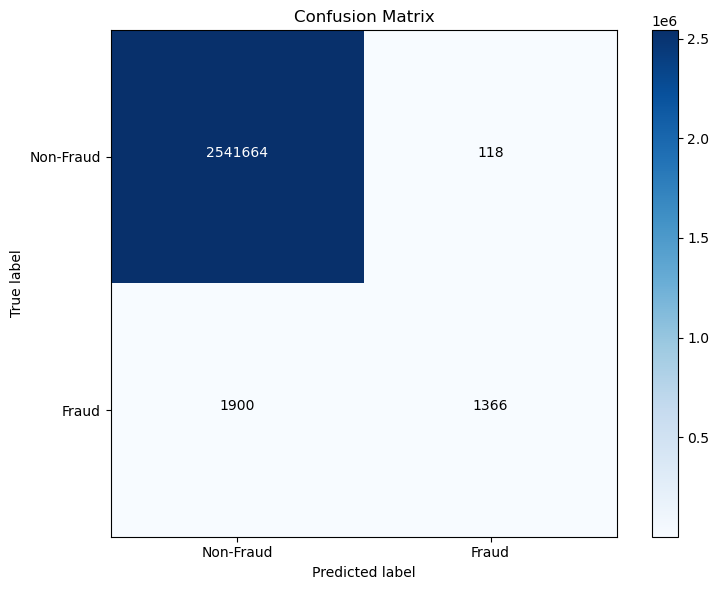

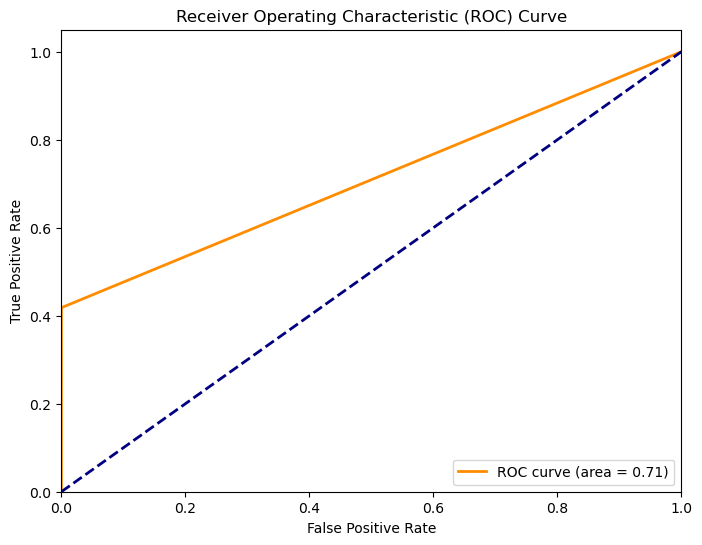

In [75]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.yticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()

for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot Receiver Operating Characteristic curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
